In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tqdm import tqdm

In [2]:
# df = pd.read_csv("../data/full_df_cleaned_v3.csv")
df = pd.read_csv("../data/Dataset/image_data_one_hot.csv")
df.head(2)

,filepath,filename,normal,cataract,diabetic_retinopathy,glaucoma
0,normal\1034_left.jpg,1034_left.jpg,1,0,0,0
1,normal\1034_right.jpg,1034_right.jpg,1,0,0,0


In [3]:
df.columns

Index(['filepath', 'filename', 'normal', 'cataract', 'diabetic_retinopathy',
       'glaucoma'],
      dtype='object')

In [23]:
# y = np.array(df.drop(['Diagnostic', 'file', 'target_init', 'Target','tarstr',
#                         'filename','Patient Age', 'Patient Sex'],axis=1))
y = np.array(df.drop(['filepath','filename'],axis=1))
y.shape

(4217, 4)

In [24]:
# IMAGE_PATH = 'D:/College/6th_Semester/Mini_Project/data/preprocessed_images2/'
IMAGE_PATH = r'D:\College\6th_Semester\Mini_Project\data\Dataset\archive (1)\dataset'

In [25]:
# df['filepath'] = IMAGE_PATH + df['filename']
import os

IMAGE_PATH = r'D:\College\6th_Semester\Mini_Project\data\Dataset\archive (1)\dataset'
df['filepath'] = df['filepath'].apply(lambda x: os.path.join(IMAGE_PATH, x))


In [26]:
df.sample()

,filepath,filename,normal,cataract,diabetic_retinopathy,glaucoma
877,D:\College\6th_Semester\Mini_Project\data\Data...,3255_right.jpg,1,0,0,0


In [27]:

train_image = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img(df['filepath'][i],target_size=(256,256,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 4217/4217 [00:37<00:00, 111.59it/s]


In [28]:
X.shape


(4217, 256, 256, 3)

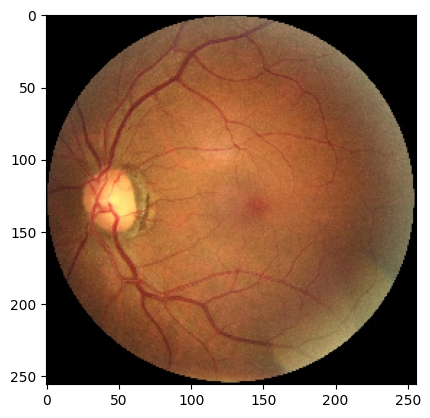

In [29]:
plt.imshow(X[2])


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [34]:
def initialize_model():
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=(2, 2), activation="relu", input_shape=(256,256,3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
        optimizer='adam',
        metrics=['accuracy'])

    return model

In [35]:
model = initialize_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 255, 255, 16)   │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 58, 58, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 25, 25, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,346,868 (5.14 MB)

 Trainable params: 1,346,868 (5.14 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:

model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.6949 - loss: 0.3025 - val_accuracy: 0.7559 - val_loss: 0.2958
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.7060 - loss: 0.2928 - val_accuracy: 0.7251 - val_loss: 0.2949
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.7376 - loss: 0.2904 - val_accuracy: 0.7938 - val_loss: 0.2672
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.7461 - loss: 0.2726 - val_accuracy: 0.7536 - val_loss: 0.2716
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7530 - loss: 0.2784 - val_accuracy: 0.8152 - val_loss: 0.2370
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.7646 - loss: 0.2579 - val_accuracy: 0.8270 - val_loss: 0.2348
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7797 - loss: 0.2515 - val_accuracy: 0.8270 - val_loss: 0.2119
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7879 - loss: 0.2406 - val_accuracy: 0.8128 - val_lo

In [39]:
model.evaluate(X_test, y_test, verbose=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.8867 - loss: 0.1589


[0.18053919076919556, 0.8578199148178101]

In [40]:
model.save("multilabel_final.h5")

In [42]:
y_pred = model.predict(X_train)

119/119 ━━━━━━━━━━━━━━━━━━━━ 27s 221ms/step


In [57]:
df.sample(2)

,filepath,filename,normal,cataract,diabetic_retinopathy,glaucoma
1280,D:\College\6th_Semester\Mini_Project\data\Data...,2212_right.jpg,0,1,0,0
861,D:\College\6th_Semester\Mini_Project\data\Data...,3242_left.jpg,1,0,0,0


In [60]:
y_pred[1280]

array([0.6117907 , 0.15133393, 0.00448254, 0.29453534], dtype=float32)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming y_true are the true labels and y_pred are the predicted labels
conf_matrix = confusion_matrix(y_train, y_pred)
class_report = classification_report(y_train, y_pred)
fpr, tpr, _ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification Report
print("Classification Report:\n", class_report)


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets